# Selections in medical colleges

Three lacs candidates sat for entrence test. Only 10000 seats are available for admission. Out of these 1000 are in the top level medical colleges and rest will be absorbed by regional colleges. This is a problem of calculation of percentile. This is because in actual data there may be many candidates getting same marks.

One way to find the percentile by direct calculation by numbers

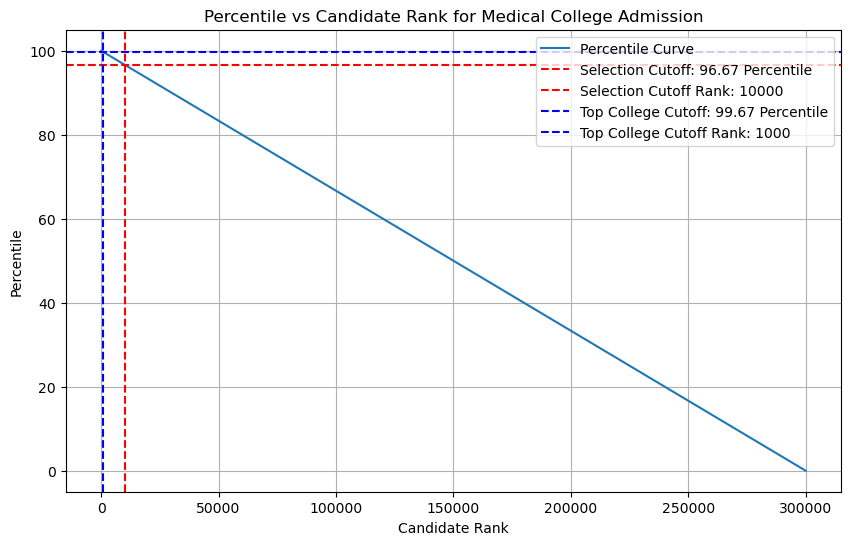

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Calculation
total_candidates = 300000
selected_candidates = 10000
top_college_seats = 1000

# Percentile calculations
percentile_min = (1 - (selected_candidates / total_candidates)) * 100
percentile_top_college = (1 - (top_college_seats / total_candidates)) * 100

# Plotting
x = np.arange(1, total_candidates + 1)
y = (1 - (x / total_candidates)) * 100

plt.figure(figsize=(10, 6))

# Overall Percentile Curve
plt.plot(x, y, label='Percentile Curve')

# Minimum Percentile for Selection
plt.axhline(y=percentile_min, color='r', linestyle='--', label=f'Selection Cutoff: {percentile_min:.2f} Percentile')
plt.axvline(x=selected_candidates, color='r', linestyle='--', label=f'Selection Cutoff Rank: {selected_candidates}')

# Minimum Percentile for Top College
plt.axhline(y=percentile_top_college, color='b', linestyle='--', label=f'Top College Cutoff: {percentile_top_college:.2f} Percentile')
plt.axvline(x=top_college_seats, color='b', linestyle='--', label=f'Top College Cutoff Rank: {top_college_seats}')

plt.xlabel('Candidate Rank')
plt.ylabel('Percentile')
plt.title('Percentile vs Candidate Rank for Medical College Admission')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


# Now the actual data includes lots of ties among themselves.

This makes the calculation slightly more complex. In this approach ..
- We generate random marks for 300,000 candidates.
- We assign ranks, ensuring candidates with the same marks have the same rank.
- We compute percentiles using these ranks.
- We plot the percentile curve with appropriate cutoff lines.


      Marks    Rank
0       100     1.0
1       100     1.0
2       100     1.0
3       100     1.0
4       100     1.0
...     ...     ...
9995     97  8934.0
9996     97  8934.0
9997     97  8934.0
9998     97  8934.0
9999     97  8934.0

[10000 rows x 2 columns]


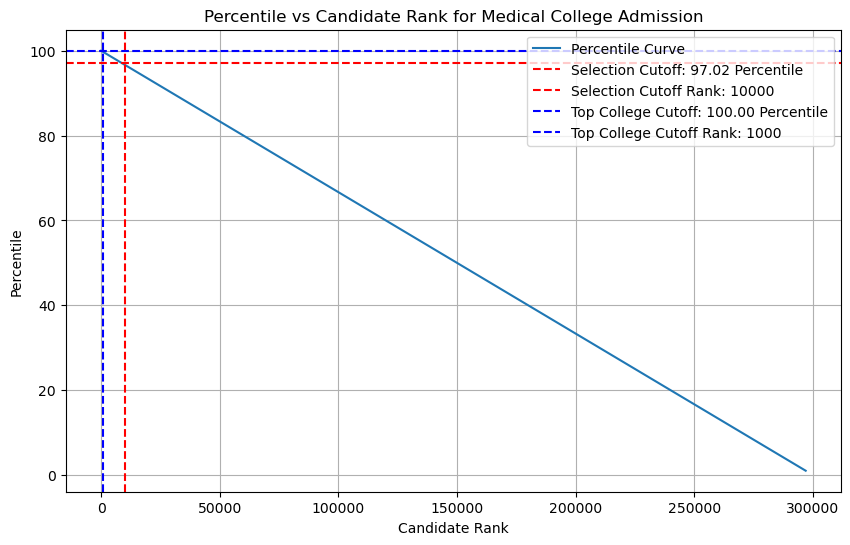

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculation
total_candidates = 300000
selected_candidates = 10000
top_college_seats = 1000

# Generating example data with ties
np.random.seed(0)
data = np.random.randint(0, 101, size=300000)
df = pd.DataFrame(data, columns=['Marks'])

# Rank candidates, accounting for ties
df['Rank'] = df['Marks'].rank(method='min', ascending=False)
df = df.sort_values(by='Marks', ascending=False).reset_index(drop=True)

# Calculate percentiles
df['Percentile'] = (1 - (df['Rank'] / total_candidates)) * 100

# Minimum percentiles for selection
percentile_min = df.loc[df['Rank'] <= selected_candidates, 'Percentile'].min()
percentile_top_college = df.loc[df['Rank'] <= top_college_seats, 'Percentile'].min()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Rank'], df['Percentile'], label='Percentile Curve')
plt.axhline(y=percentile_min, color='r', linestyle='--', label=f'Selection Cutoff: {percentile_min:.2f} Percentile')
plt.axvline(x=selected_candidates, color='r', linestyle='--', label=f'Selection Cutoff Rank: {selected_candidates}')
plt.axhline(y=percentile_top_college, color='b', linestyle='--', label=f'Top College Cutoff: {percentile_top_college:.2f} Percentile')
plt.axvline(x=top_college_seats, color='b', linestyle='--', label=f'Top College Cutoff Rank: {top_college_seats}')
plt.xlabel('Candidate Rank')
plt.ylabel('Percentile')
plt.title('Percentile vs Candidate Rank for Medical College Admission')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
